In [1]:
#Assignment 3

Populating the interactive namespace from numpy and matplotlib


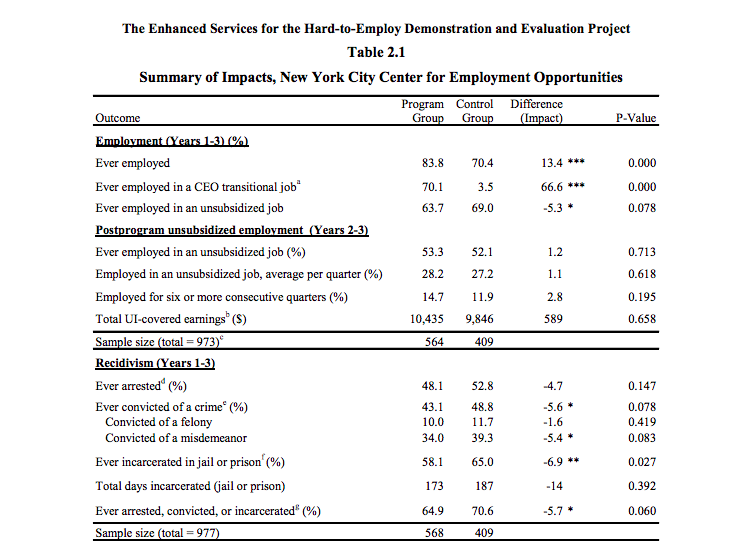

In [3]:
import os
import sys
import numpy as np
import pylab as pl

%pylab inline

from IPython.display import Image
Image(filename='NYC.png')

NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05
 $H_0: P_0 - P_1 \geq$ 0

 $H_a: P_0 - P_1 $< 0

 $\alpha$ = 0.05

this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above):

 $P_0=0.035, P_1=0.701$



In [4]:
# first thing: choose your significance threshold
alpha=0.05

# we like fractions better then percentages. as a rule of thumb, either use fractions or counts. 
# 0 for control group, 1 for program group

P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

#sample sizes 

n_0 = 409
n_1 = 564
    
#lets get the counts by multiplying by the sample size

Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

we must assess the statistical significance


WHICH TEST?
samples, categorical data

TWO OPTIONS z test, or chi-square test.

START WITH Z TEST
the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the assumption of normality

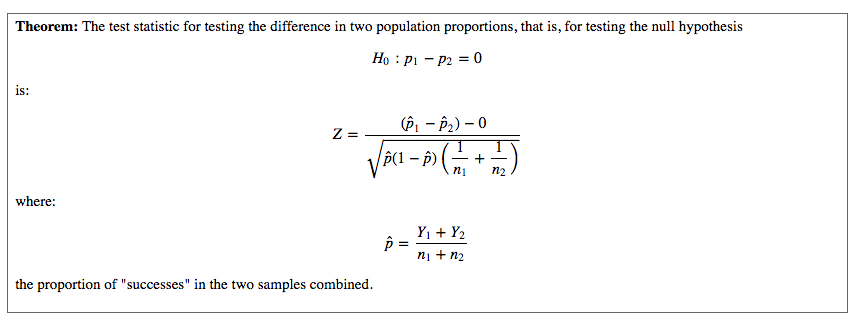

In [7]:
Image('ztest.png')

must define the sample standard deviation (standard error)

In [8]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.4210472764645426


In [10]:
# p value
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))

z score: how many standard deviation away from the population parameter is my statistic?

In [11]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)

20.7697865408


In [14]:
p_2y = 1 - 0.9984


def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_2y, alpha)

is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


Now lets look at the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?

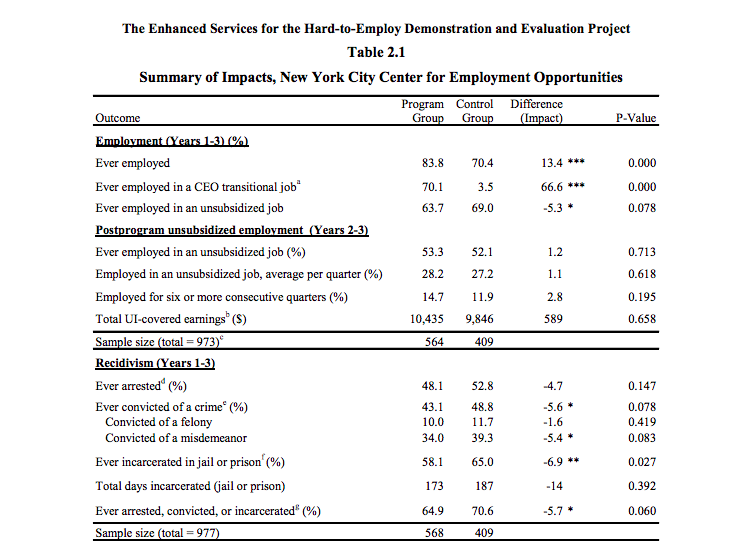

In [15]:
Image(filename='NYC.png')

NULL HYPOTHESIS: the % of former prisoners convicted of a felony after release is the same or higher for candidates who participated in the program as for the control group, significance level p=0.05
 $H_0: P_0 - P_1 \leq$ 0

 $H_a: P_0 - P_1 $> 0

 $\alpha$ = 0.05

this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above):

 $P_0=0.393, P_1=0.340$



In [17]:
# first thing: choose your significance threshold
alpha=0.05

# we like fractions better then percentages. as a rule of thumb, either use fractions or counts. 
# 0 for control group, 1 for program group

P_0 = 39.3 * 0.01 
P_1 = 34.0 * 0.01

if P_0 - P_1 <= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

#sample sizes 

n_0 = 409
n_1 = 564
    
#lets get the counts by multiplying by the sample size

Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

we must assess the statistical significance


WHICH TEST?
samples, categorical data

TWO OPTIONS z test, or chi-square test.

START WITH Z TEST
the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the assumption of normality

must define the sample standard deviation (standard error)

In [18]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.36227852004111


In [19]:
# p value
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))

z score: how many standard deviation away from the population parameter is my statistic?

In [20]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_3y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_3y)

-1.69778948828


In [21]:
p_3y = 1 - 0.9545


def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_3y, alpha)

is the p value 0.05 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


Now lets do it with the $\chi^2$ test
this analysis can also be done with the $\chi^2$ test, and the  $\chi^2$ distribution,

see flowcharts for how to choose a test and "Statistics In a Nutshell Chapter 4", or http://math.hws.edu/javamath/ryan/ChiSquare.html (if you are really just interested in the formula at face value)

The chisq statistics tests the statistics calculated as :

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

against a chi sq distribution. If we talk about sample fractions that is

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

Where i indicates the sum over each cell. turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

The trickiest part (but not that tricky) is to figure out how to construct the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example: Thisis called a CONTINGENCY TABLE

success	failure	
test sample	number of successes in test	number of failures in test	number members of test sample
control sample	number of successes in control	number of failures in control	number members of control sample
total successes	total failures	number of all members
employed in subsadized job	employed	not employed
test sample	$0.701*564$	$0.299*564$	564
control sample	$0.035*409$	$0.965*4.09$	409
total	409.679	562.912	973
for each cell the expected ratio is the product of the total of all rows and all columns, devided by the total

FOR EACH CELL: expected_cell = $\frac{row~tot * col~tot}{total}$

|                 |     success         | failure|    |               \n,
    |-----------------|:-------------------:|:-------------------:|---------------------------|\n,
    | test sample     | number of successes in test    | number of failures in test    | number members of test sample |\n",
    | control sample  | number of successes in control | number of failures in control | number members of control sample| \n",
    |                 | total successes                |  total failures               | number of all members         |\n",
    "\n",
    "|employed in subsadized job |     employed          | not employed     |                   \n",
    "|---------------------------|:---------------------:|------------------|---------------------------|\n",
    "| test sample               | $0.701*564$           | $0.299*564$      | 564                       |\n",
    "| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |\n",
    "|                           |                       |                  |                           |\n",
    "| total                     | 409.679               |  562.912         | 973                       |"